In [57]:
import pandas as pd
df = pd.read_csv('../Pregunta3.csv')

In [58]:
df

,nro,conoce_de_videojuegos,juega_en_pc,estudia,mira_futbol,compra_videojuego
0,1,si,si,no,si,si
1,2,si,no,no,si,si
2,3,si,si,si,no,no
3,4,si,no,no,si,si
4,5,no,si,si,no,no
5,6,no,no,si,si,no
6,7,no,si,si,si,si
7,8,si,no,si,no,no
8,9,si,no,no,no,si


In [59]:
#Keys actuales, sin embargo el 'nro' no nos interesa para los algoritmos
df.keys()

Index(['nro', 'conoce_de_videojuegos', 'juega_en_pc', 'estudia', 'mira_futbol',
       'compra_videojuego'],
      dtype='object')

In [60]:
#Se elimina la columna 'nro'
df.drop(["nro"],axis=1, inplace = True)

In [61]:
df

,conoce_de_videojuegos,juega_en_pc,estudia,mira_futbol,compra_videojuego
0,si,si,no,si,si
1,si,no,no,si,si
2,si,si,si,no,no
3,si,no,no,si,si
4,no,si,si,no,no
5,no,no,si,si,no
6,no,si,si,si,si
7,si,no,si,no,no
8,si,no,no,no,si


In [62]:
#Se convierten a numéricos todos los valores
df = pd.get_dummies(df, columns = ["conoce_de_videojuegos"], drop_first = True)
df = pd.get_dummies(df, columns = ["juega_en_pc"], drop_first = True)
df = pd.get_dummies(df, columns = ["estudia"], drop_first = True)
df = pd.get_dummies(df, columns = ["mira_futbol"], drop_first = True)
df = pd.get_dummies(df, columns = ["compra_videojuego"], drop_first = True)
df_tree = df
df

,conoce_de_videojuegos_si,juega_en_pc_si,estudia_si,mira_futbol_si,compra_videojuego_si
0,1,1,0,1,1
1,1,0,0,1,1
2,1,1,1,0,0
3,1,0,0,1,1
4,0,1,1,0,0
5,0,0,1,1,0
6,0,1,1,1,1
7,1,0,1,0,0
8,1,0,0,0,1


In [64]:
#se preparan las variables X e y 
import numpy as np
X = np.array(df.drop(['compra_videojuego_si'],1))
y = np.array(df['compra_videojuego_si'])
X.shape

(9, 4)

In [65]:
#la data está balanceada 
#4 (compra_videojuego_si = 0 = no)
#4 (compra_videojuego_si = 1 = si)
df.groupby('compra_videojuego_si').size()

compra_videojuego_si
0    4
1    5
dtype: int64

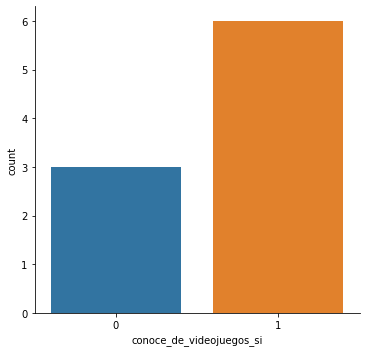

In [66]:
import seaborn as sb
sb.catplot('conoce_de_videojuegos_si',data=df,kind="count")

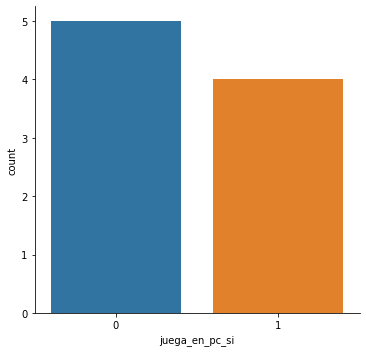

In [67]:
sb.catplot('juega_en_pc_si',data=df,kind="count")

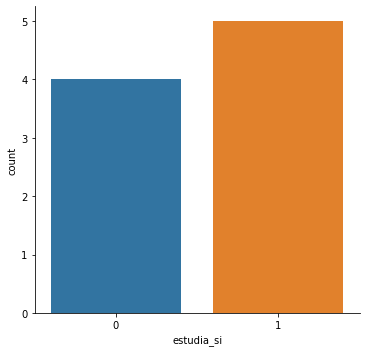

In [68]:
sb.catplot('estudia_si',data=df,kind="count")

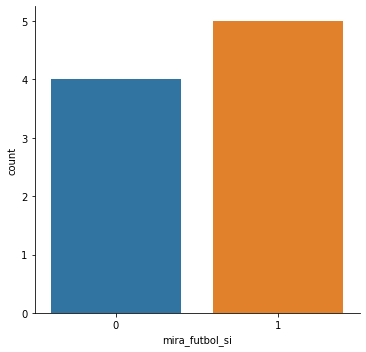

In [69]:
sb.catplot('mira_futbol_si',data=df,kind="count")

In [70]:
df[['conoce_de_videojuegos_si', 'compra_videojuego_si']].groupby(['conoce_de_videojuegos_si'], as_index=False).agg(['mean', 'count', 'sum'])

compra_videojuego_si          
                                         mean count sum
conoce_de_videojuegos_si                               
0                                    0.333333     3   1
1                                    0.666667     6   4

In [71]:
df[['juega_en_pc_si', 'compra_videojuego_si']].groupby(['juega_en_pc_si'], as_index=False).agg(['mean', 'count', 'sum'])

compra_videojuego_si          
                               mean count sum
juega_en_pc_si                               
0                               0.6     5   3
1                               0.5     4   2

In [72]:
df[['estudia_si', 'compra_videojuego_si']].groupby(['estudia_si'], as_index=False).agg(['mean', 'count', 'sum'])

compra_videojuego_si          
                           mean count sum
estudia_si                               
0                           1.0     4   4
1                           0.2     5   1

In [73]:
df[['mira_futbol_si', 'compra_videojuego_si']].groupby(['mira_futbol_si'], as_index=False).agg(['mean', 'count', 'sum'])

compra_videojuego_si          
                               mean count sum
mira_futbol_si                               
0                              0.25     4   1
1                              0.80     5   4

In [74]:
"""
la función de KFold que nos ayudará a crear varios subgrupos con nuestros datos de entrada para validar 
y valorar los árboles con diversos niveles de profundidad.
"""
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier

cv = KFold(n_splits=5) # Numero deseado de "folds" que haremos
accuracies = list()
max_attributes = len(list(df))
depth_range = range(1, max_attributes + 1)

# Testearemos la profundidad de 1 a cantidad de atributos +1
for depth in depth_range:
    fold_accuracy = []
    tree_model = DecisionTreeClassifier(criterion='entropy',
                                             min_samples_split=20,
                                             min_samples_leaf=5,
                                             max_depth = depth,
                                             class_weight={1:3.5})
    for train_fold, valid_fold in cv.split(df):
        f_train = df.loc[train_fold] 
        f_valid = df.loc[valid_fold] 
 
        model = tree_model.fit(X = f_train.drop(['compra_videojuego_si'], axis=1), 
                               y = f_train["compra_videojuego_si"]) 
        valid_acc = model.score(X = f_valid.drop(['compra_videojuego_si'], axis=1), 
                                y = f_valid["compra_videojuego_si"]) # calculamos la precision con el segmento de validacion
        fold_accuracy.append(valid_acc)
 
    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    
# Mostramos los resultados obtenidos
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))

 Max Depth  Average Accuracy
         1               0.6
         2               0.6
         3               0.6
         4               0.6
         5               0.6


In [118]:
"""
from sklearn import tree
from subprocess import check_call
from IPython.display import Image as PImage
from PIL import Image, ImageDraw, ImageFont
"""
# Crear arrays de entrenamiento y las etiquetas que indican si compró o no el videojuego
y_train = df_tree['compra_videojuego_si']
x_train = df_tree.drop(['compra_videojuego_si'], axis=1).values 
 
# Crear Arbol de decision con profundidad = 4
decision_tree = DecisionTreeClassifier(criterion='entropy',
                                            min_samples_split=20,
                                            min_samples_leaf=5,
                                            max_depth = 4,
                                            class_weight={1:3.5})
decision_tree.fit(x_train, y_train)
 
# exportar el modelo a archivo .dot
with open(r"tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 4,
                              impurity = True,
                              feature_names = list(df_tree.drop(['compra_videojuego_si'], axis=1)),
                              class_names = ['NO compra videojuego', 'SI compra videojuego'],
                              rounded = True,
                              filled= True )
        



import pydot
(graph,) = pydot.graph_from_dot_file(r"tree1.dot")
graph.write_png(r"tree1.dot")
img = Image.open(r"tree1.dot")
img.show() # muetra la imagen con el visualizador de fotos de windows.
"""
#Convertir el archivo .dot a png para poder visualizarlo
check_call(['dot','-Tpng','tree1.dot','-o','tree1.png'])
PImage("tree1.png")
"""

'\n#Convertir el archivo .dot a png para poder visualizarlo\ncheck_call([\'dot\',\'-Tpng\',\'tree1.dot\',\'-o\',\'tree1.png\'])\nPImage("tree1.png")\n'

In [119]:
f

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [36]:
from sklearn.tree import DecisionTreeClassifier
algoritmo = DecisionTreeClassifier(criterion = 'entropy')

In [37]:
algoritmo.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [38]:
y_pred = algoritmo.predict(X_test)

In [39]:
# MATRIZ DE CONFUSIÓN
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[0 1]
 [0 1]]


In [40]:
# Precisión del modelo
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
0.5
